In [20]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier





## Dataset Overview


In [2]:
AI_Human=pd.read_csv("AI_Human_Detection.zip")
print(AI_Human)

                                           text_content      content_type  \
0     Score each cause. Quality throughout beautiful...    academic_paper   
1     Board its rock. Job worker break tonight coupl...             essay   
2     Way debate decision produce. Dream necessary c...    academic_paper   
3     Story turn because such during open model. Tha...  creative_writing   
4     Place specific as simply leader fall analysis....      news_article   
...                                                 ...               ...   
1362  Congress month from thought instead anything. ...    academic_paper   
1363  Learn lead reveal great action. Left theory pa...           article   
1364  Third few low hard peace paper pass front. Mea...      social_media   
1365  Power word west very news. Truth action base p...         blog_post   
1366  Beyond card must former. Leave where join kind...         blog_post   

      word_count  character_count  sentence_count  lexical_diversity  \
0  

In [3]:
AI_Human.shape

(1367, 17)

In [4]:
AI_Human.columns

Index(['text_content', 'content_type', 'word_count', 'character_count',
       'sentence_count', 'lexical_diversity', 'avg_sentence_length',
       'avg_word_length', 'punctuation_ratio', 'flesch_reading_ease',
       'gunning_fog_index', 'grammar_errors', 'passive_voice_ratio',
       'predictability_score', 'burstiness', 'sentiment_score', 'label'],
      dtype='object')

In [5]:
AI_Human.head()

text_content      content_type  \
0  Score each cause. Quality throughout beautiful...    academic_paper   
1  Board its rock. Job worker break tonight coupl...             essay   
2  Way debate decision produce. Dream necessary c...    academic_paper   
3  Story turn because such during open model. Tha...  creative_writing   
4  Place specific as simply leader fall analysis....      news_article   

   word_count  character_count  sentence_count  lexical_diversity  \
0         288             1927              54             0.9514   
1         253             1719              45             0.9723   
2         420             2849              75             0.9071   
3         196             1310              34             0.9592   
4         160             1115              28             0.9688   

   avg_sentence_length  avg_word_length  punctuation_ratio  \
0                 5.33             5.69             0.0280   
1                 5.62             5.80             0.0262   
2                 5.60             5.79             0.0263   
3                 5.76             5.69             0.0260   
4                 5.71             5.97             0.0251   

   flesch_reading_ease  gunning_fog_index  grammar_errors  \
0                53.08               7.41               1   
1                50.32               8.10               6   
2                46.86               7.86               5   
3                53.80               7.00               2   
4                44.53               8.29               0   

   passive_voice_ratio  predictability_score  burstiness  sentiment_score  \
0               0.1041                105.86      0.5531           0.2034   
1               0.2045                100.29      0.5643           0.4854   
2               0.2308                 96.88      0.4979          -0.2369   
3               0.1912                 88.79      0.6241              NaN   
4               0.1318                 26.15      0.2894              NaN   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

In [6]:
AI_Human.isnull().sum()

text_content             0
content_type             0
word_count               0
character_count          0
sentence_count           0
lexical_diversity        0
avg_sentence_length      0
avg_word_length          0
punctuation_ratio        0
flesch_reading_ease     79
gunning_fog_index       35
grammar_errors           0
passive_voice_ratio     31
predictability_score     0
burstiness               0
sentiment_score         54
label                    0
dtype: int64

In [7]:
AI_Human.describe()

word_count  character_count  sentence_count  lexical_diversity  \
count  1367.000000      1367.000000     1367.000000        1367.000000   
mean    140.190929       940.329188       25.610095           0.967646   
std      97.410218       654.335255       17.867480           0.026254   
min       3.000000        14.000000        1.000000           0.875000   
25%      61.500000       410.500000       11.000000           0.951550   
50%     131.000000       882.000000       24.000000           0.969200   
75%     193.000000      1294.500000       35.000000           0.989100   
max     443.000000      2966.000000       83.000000           1.000000   

       avg_sentence_length  avg_word_length  punctuation_ratio  \
count          1367.000000      1367.000000        1367.000000   
mean              5.486423         5.717783           0.027440   
std               0.447202         0.279636           0.002801   
min               3.000000         4.000000           0.019400   
25%               5.270000         5.590000           0.026100   
50%               5.480000         5.710000           0.027200   
75%               5.700000         5.830000           0.028400   
max               8.000000         8.330000           0.071400   

       flesch_reading_ease  gunning_fog_index  grammar_errors  \
count          1288.000000        1332.000000     1367.000000   
mean             52.183377           7.556877        1.537674   
std              10.466570           1.866676        1.912012   
min             -50.010000           1.200000        0.000000   
25%              47.712500           6.620000        0.000000   
50%              52.190000           7.515000        1.000000   
75%              57.322500           8.390000        3.000000   
max              98.870000          27.870000       10.000000   

       passive_voice_ratio  predictability_score   burstiness  \
count          1336.000000           1367.000000  1367.000000   
mean              0.150198             62.779049     0.427041   
std               0.056738             28.223550     0.199249   
min               0.050000             20.030000     0.101100   
25%               0.099675             39.015000     0.250000   
50%               0.151350             56.820000     0.408500   
75%               0.200150             86.645000     0.594300   
max               0.250000            119.930000     0.799500   

       sentiment_score        label  
count      1313.000000  1367.000000  
mean         -0.007997     0.499634  
std           0.588354     0.500183  
min          -0.999300     0.000000  
25%          -0.525800     0.000000  
50%          -0.006200     0.000000  
75%           0.502800     1.000000  
max           0.995900     1.000000

In [8]:
AI_Human['content_type'].value_counts()

content_type
academic_paper      189
news_article        185
blog_post           183
creative_writing    172
article             171
essay               161
social_media        154
product_review      152
Name: count, dtype: int64

## AI vs Human Content Distribution


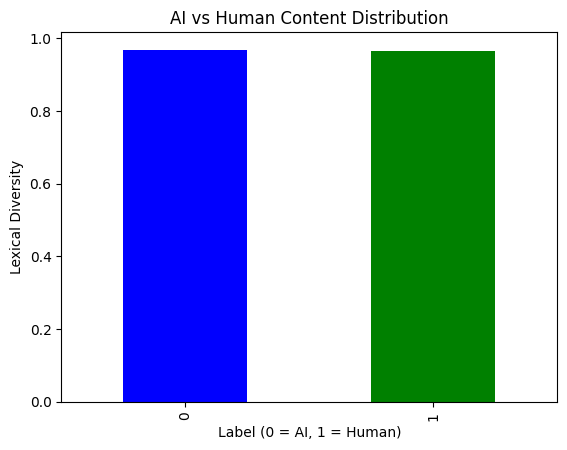

In [9]:
fig, ax = plt.subplots()
AI_Human.groupby("label")["lexical_diversity"].mean().plot(kind="bar",  color=["blue", "green"])

ax.set_title("AI vs Human Content Distribution")
ax.set_xlabel("Label (0 = AI, 1 = Human)")
ax.set_ylabel("Lexical Diversity")

plt.show()



# Sentence Length Comparision

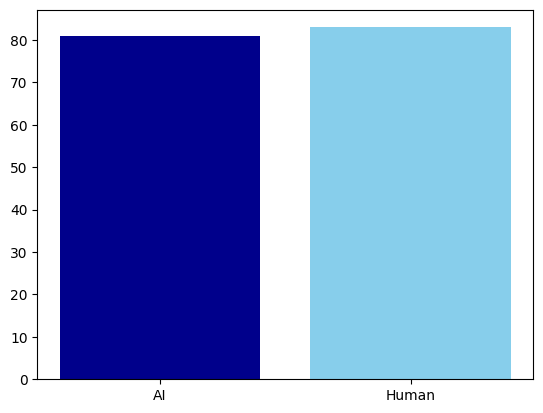

In [10]:
avg_sentence=AI_Human.groupby("label")["sentence_count"].max()

plt.bar(["AI","Human"],avg_sentence, color=["Darkblue","skyblue"])
ax.set_xlabel("Content Type",fontsize=12)
ax.set_ylabel("Average_count",fontsize=12)
plt.show()







# Text Length Analysis: Characters vs Words

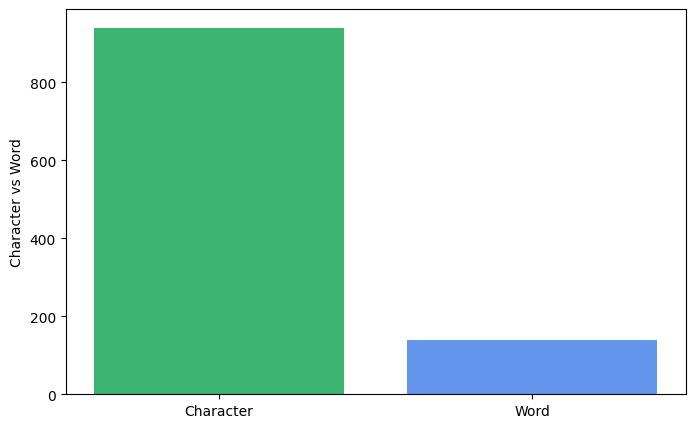

In [11]:
fig,ax=plt.subplots(figsize=(8,5))

ax.bar(["Character", "Word"],
       [AI_Human["character_count"].mean(), AI_Human["word_count"].mean()],
       color=["mediumseagreen", "cornflowerblue"])
ax.set_ylabel("Character vs Word")

plt.show()

# Scatter Plot of Punctuation Usage vs Grammar Errors

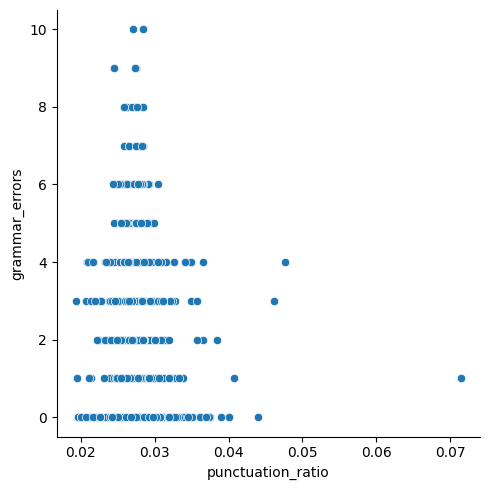

In [12]:
sns.relplot(x="punctuation_ratio",y="grammar_errors",data=AI_Human,kind="scatter")
plt.show()

# Countplot of flesch_reading_ease

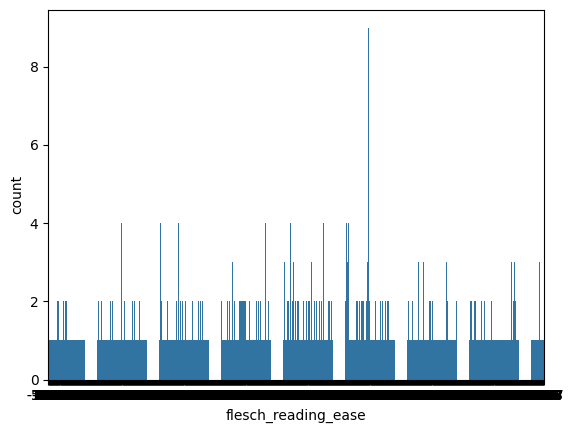

In [13]:
sns.countplot(x="flesch_reading_ease",data=AI_Human)
plt.show()

# Distribution of Passive Voice Usage

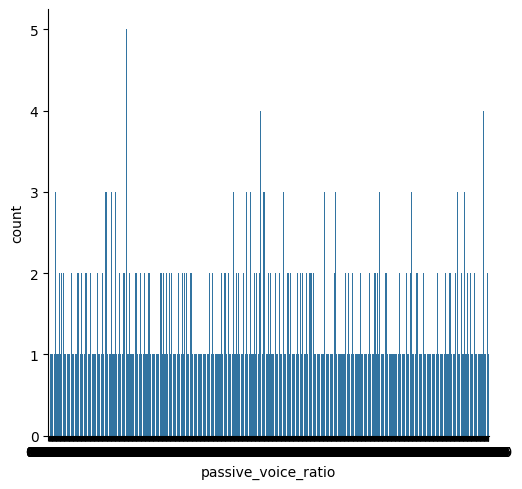

In [14]:
sns.catplot(x="passive_voice_ratio",data=AI_Human,kind="count")
plt.show()

# Word Count vs Sentence Count

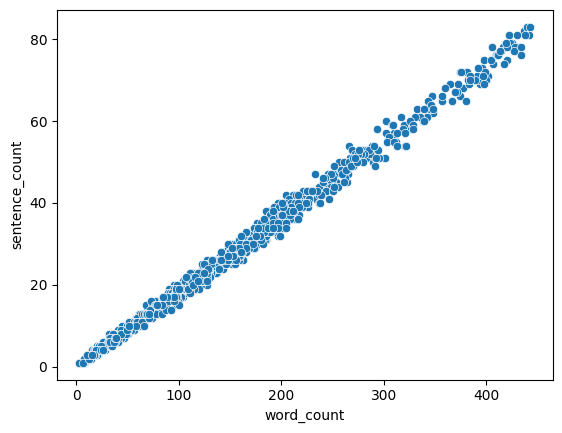

In [17]:
sns.scatterplot(x="word_count",y="sentence_count",data=AI_Human)
plt.show()

# Feature Correlation Heatmap for AI–Human Content Detection

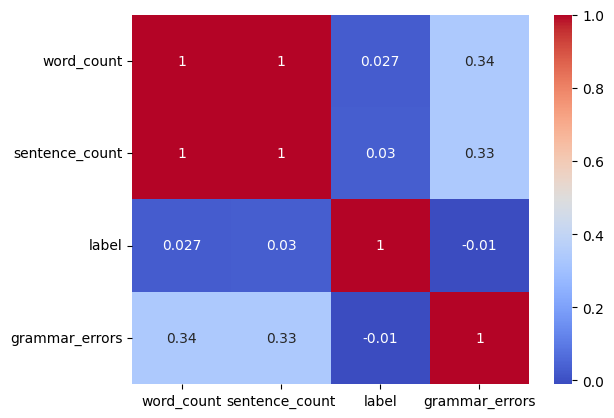

In [16]:
subset = AI_Human[["word_count", "sentence_count", "label" , "grammar_errors"]]
sns.heatmap(subset.corr(), annot=True, cmap="coolwarm")
plt.show()


# Visualizing Pairwise Feature Distributions for AI–Human Detection

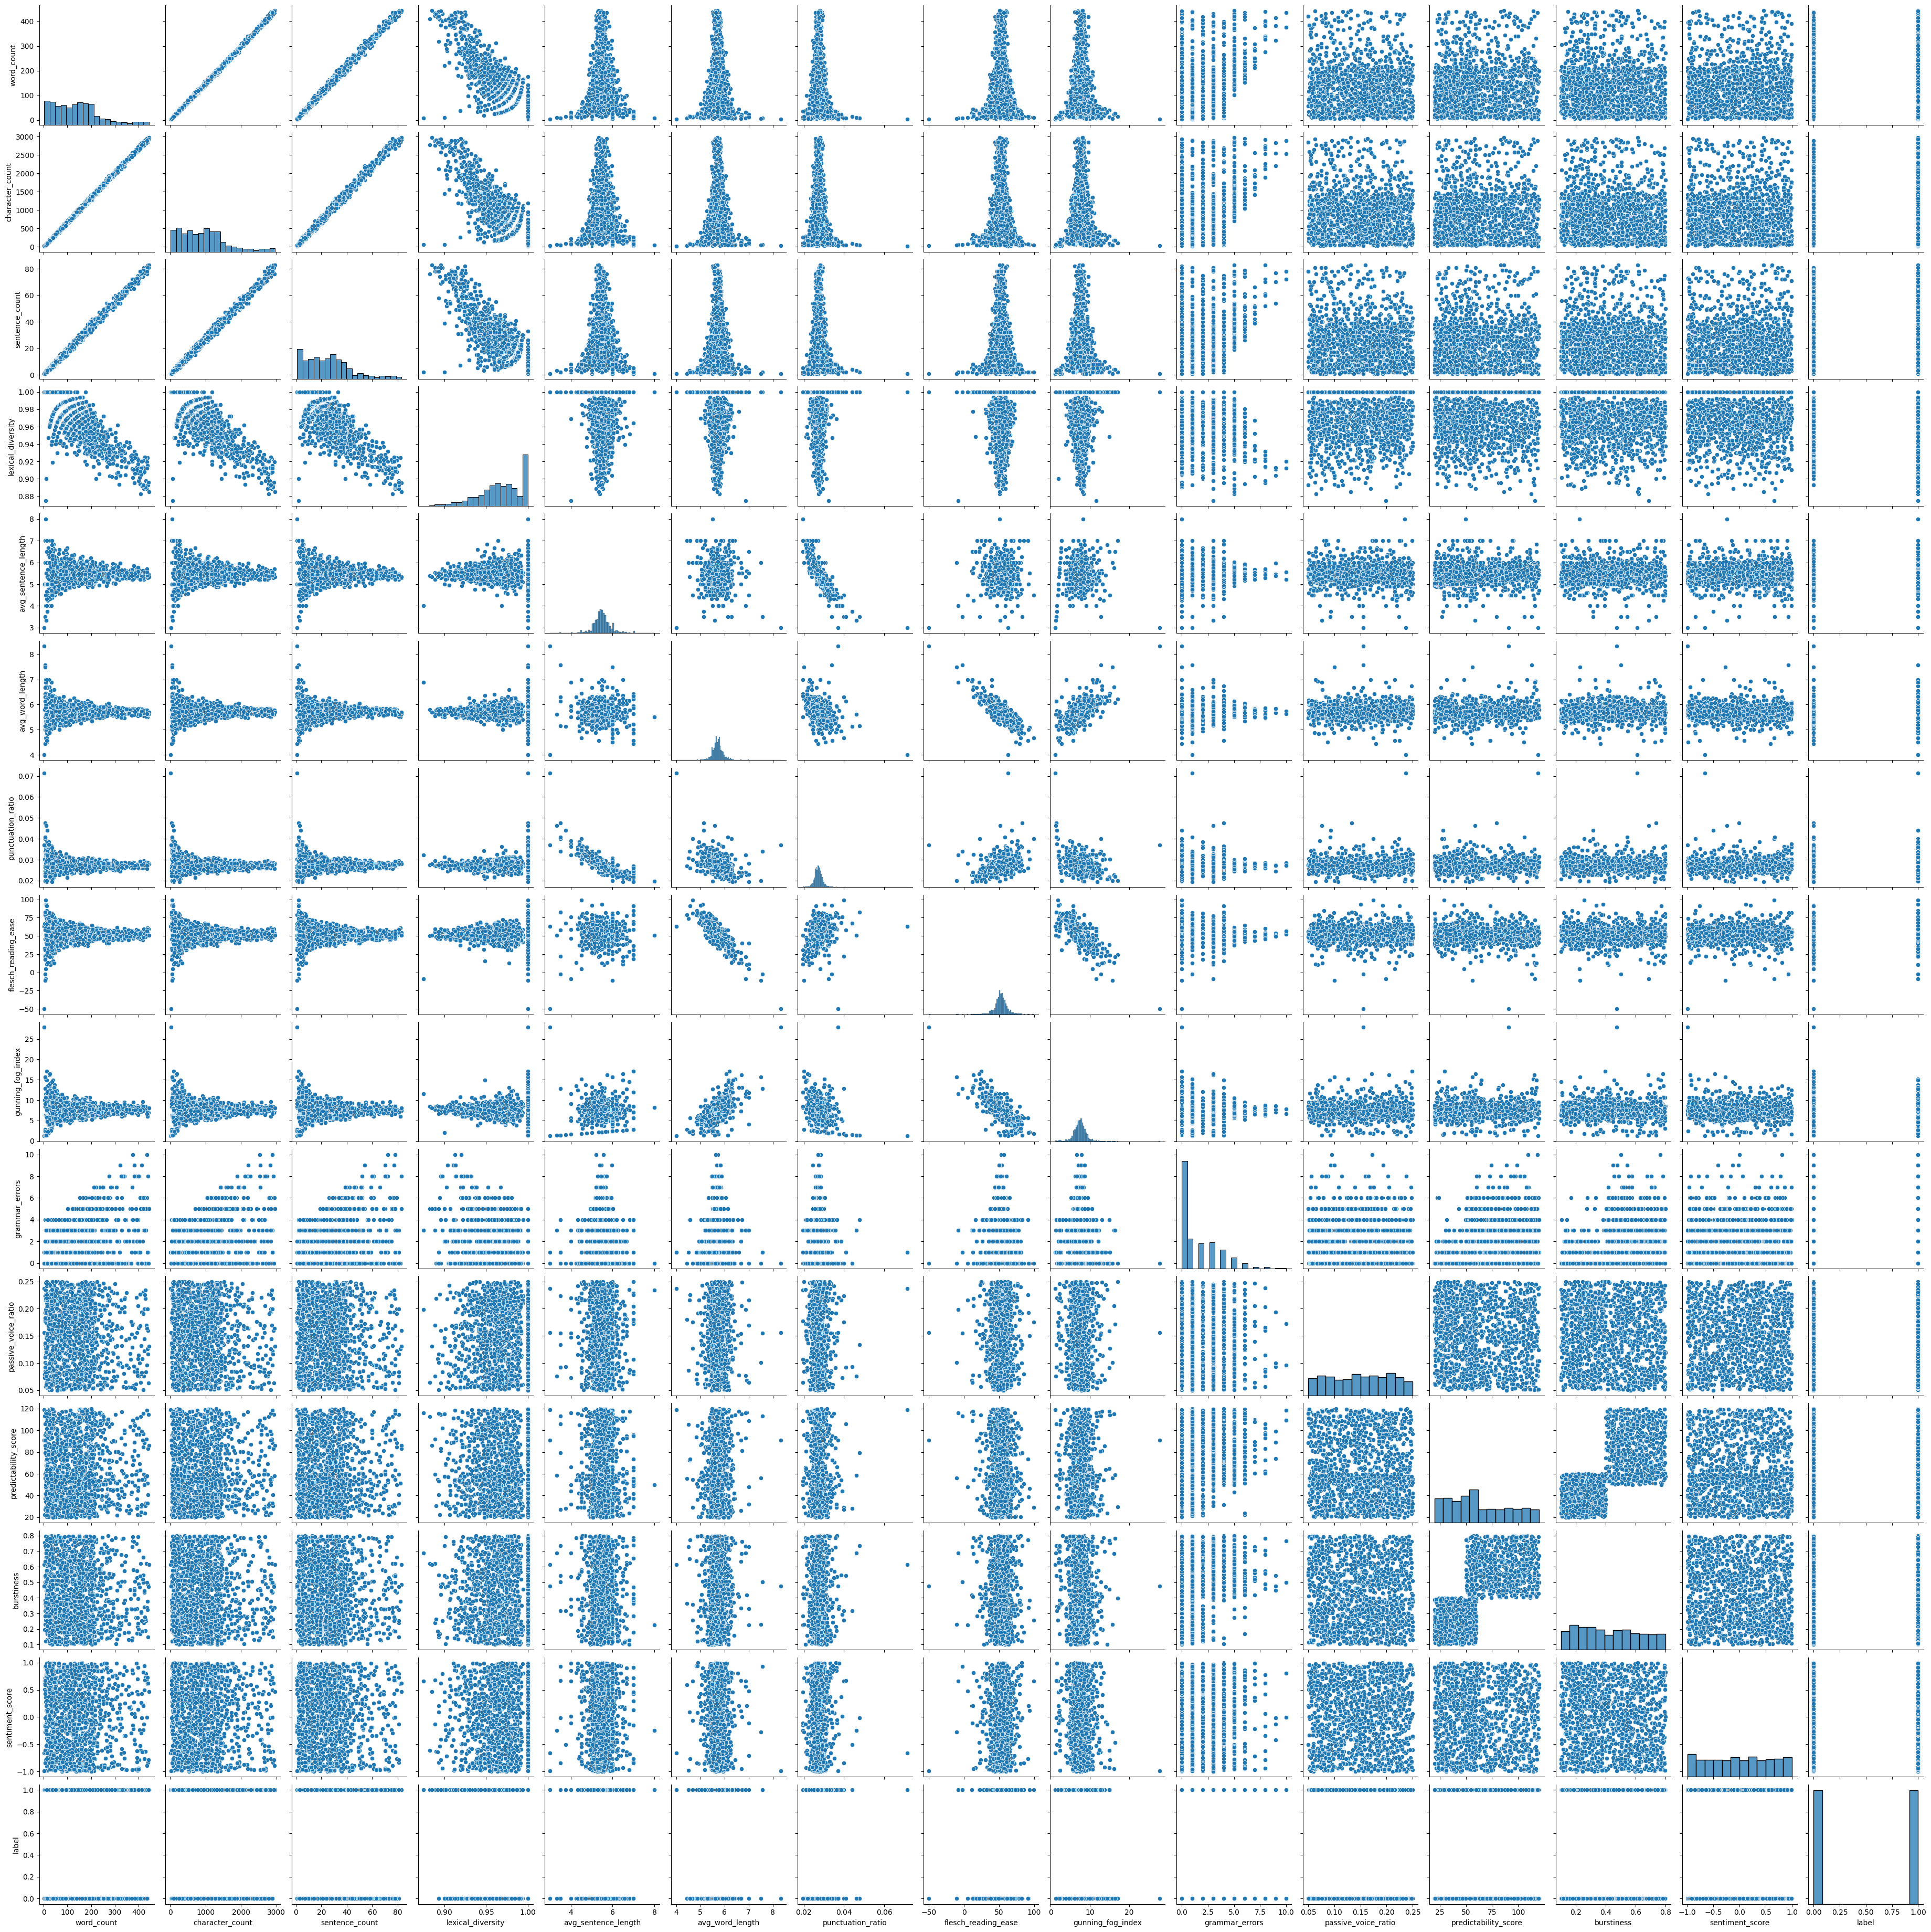

In [ ]:
sns.pairplot(data=AI_Human)
plt.show()

# Data Cleaning and Feature–Target Separation

In [4]:
AI_Human=AI_Human.dropna()
X=AI_Human.drop(columns=['text_content','content_type','label'])
Y=AI_Human['label']
print(f"Feature Shape,{X.shape} ")
print(f"Target Shape,{Y.shape} ")

Feature Shape,(1179, 14) 
Target Shape,(1179,) 


 # Train–Test Split for Model Evaluation

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_test.head())

     word_count  character_count  sentence_count  lexical_diversity  \
249         126              862              23             0.9921   
70          180             1230              34             0.9556   
772          36              240               6             1.0000   
675          95              631              17             1.0000   
257         124              815              21             0.9516   

     avg_sentence_length  avg_word_length  punctuation_ratio  \
249                 5.48             5.85             0.0267   
70                  5.29             5.84             0.0276   
772                 6.00             5.69             0.0250   
675                 5.59             5.65             0.0269   
257                 5.90             5.58             0.0258   

     flesch_reading_ease  gunning_fog_index  grammar_errors  \
249                42.15               9.18               0   
70                 47.30               8.12               0   

# Train–Test Split for Model Evaluation

In [6]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5423728813559322

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.61      0.56       113
           1       0.57      0.48      0.52       123

    accuracy                           0.54       236
   macro avg       0.55      0.55      0.54       236
weighted avg       0.55      0.54      0.54       236


Confusion Matrix:
 [[69 44]
 [64 59]]


 # Confusion Matrix Visualization for AI vs Human Classification

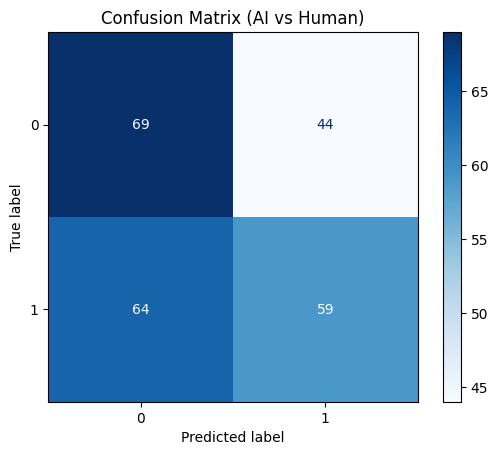

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (AI vs Human)")
plt.show()

 # Feature Importance Analysis (AI vs Human Detection)

In [9]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=2000))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=2000))])

# Selecting Input Features and Target Label

In [10]:
X = AI_Human[['word_count', 'sentence_count', 'punctuation_ratio', 'grammar_errors']]
y = AI_Human['label']



# Cross-Validation Accuracy of Logistic Regression

In [11]:

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())

Cross-validation Accuracy: 0.49787594662820045


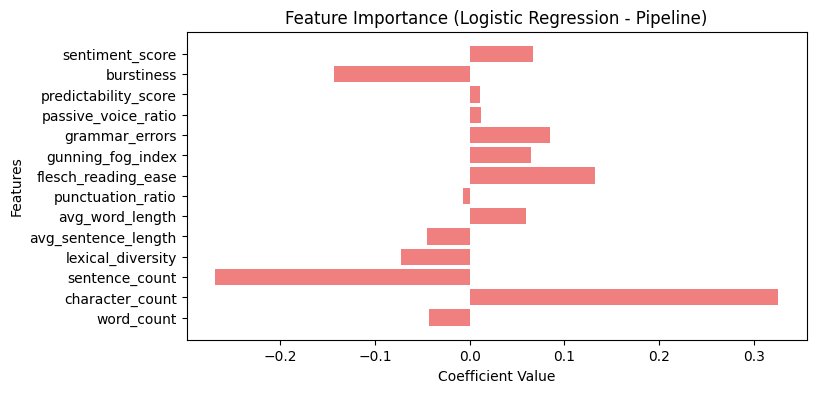

In [12]:
importance = pipeline.named_steps['model'].coef_.ravel()
features = X_train.columns

plt.figure(figsize=(8, 4))
plt.barh(features, importance, color="lightcoral")
plt.title("Feature Importance (Logistic Regression - Pipeline)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()



In [13]:
# Pipeline ko load karna
with open("pipeline.pkl", "rb") as f:
    pipeline = pickle.load(f)